# Package Testing

In [1]:
from astropy.io          import fits
from astropy             import units as u
from astropy.coordinates import SkyCoord
from lib import dictionarizer
from lib import models
from lib import calculator
import os

In [2]:
print(os.getcwd())
import sys, os
base_path = os.getcwd()
data_path  = os.path.join(base_path, 'data')
data_cube_path = os.path.join(data_path, 'saury2014','cubes')
fcnm_path = os.path.join(data_path, 'saury2014','fcnm')
rhi_path = os.path.join(data_path, 'saury2014','RHI')
print(data_cube_path)
print(fcnm_path)
print(rhi_path)

C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra
C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\data\saury2014\cubes
C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\data\saury2014\fcnm
C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\data\saury2014\RHI


In [3]:
# Training and test datasets
# 1. Datacubes: 04 datacubes with size of (512 x 512 x 101)
training_data_file_q0 = 'Tb_n01_pw02_vs12_512_thick_quarter_0_noise_1.0_K_beam_1.45_pix_.fits'
training_data_file_q1 = 'Tb_n01_pw02_vs12_512_thick_quarter_1_noise_1.0_K_beam_1.45_pix_.fits'
training_data_file_q2 = 'Tb_n01_pw02_vs12_512_thick_quarter_2_noise_1.0_K_beam_1.45_pix_.fits'
training_data_file_q3 = 'Tb_n01_pw02_vs12_512_thick_quarter_3_noise_1.0_K_beam_1.45_pix_.fits'

training_data_file_q0 = os.path.join(data_cube_path, training_data_file_q0)
training_data_file_q1 = os.path.join(data_cube_path, training_data_file_q1)
training_data_file_q2 = os.path.join(data_cube_path, training_data_file_q2)
training_data_file_q3 = os.path.join(data_cube_path, training_data_file_q3)

# 2a. R_HI maps
rhi_file_q0 = 'R_map_n01_pw02_vs12_512px_quarter_0_noise.fits'
rhi_file_q1 = 'R_map_n01_pw02_vs12_512px_quarter_1_noise.fits'
rhi_file_q2 = 'R_map_n01_pw02_vs12_512px_quarter_2_noise.fits'
rhi_file_q3 = 'R_map_n01_pw02_vs12_512px_quarter_3_noise.fits'

rhi_file_q0 = os.path.join(rhi_path, rhi_file_q0)
rhi_file_q1 = os.path.join(rhi_path, rhi_file_q1)
rhi_file_q2 = os.path.join(rhi_path, rhi_file_q2)
rhi_file_q3 = os.path.join(rhi_path, rhi_file_q3)

# 3a. FCNM maps with noise
fcnm_file_q0 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0_noise.fits'
fcnm_file_q1 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_1_noise.fits'
fcnm_file_q2 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_2_noise.fits'
fcnm_file_q3 = 'fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_3_noise.fits'

fcnm_file_q0 = os.path.join(fcnm_path, fcnm_file_q0)
fcnm_file_q1 = os.path.join(fcnm_path, fcnm_file_q1)
fcnm_file_q2 = os.path.join(fcnm_path, fcnm_file_q2)
fcnm_file_q3 = os.path.join(fcnm_path, fcnm_file_q3)

print(training_data_file_q0)
print(fcnm_file_q0)
print(rhi_file_q0)

C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\data\saury2014\cubes\Tb_n01_pw02_vs12_512_thick_quarter_0_noise_1.0_K_beam_1.45_pix_.fits
C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\data\saury2014\fcnm\fcnm_map_n01_pw02_vs12_Tcut_500K_512px_quarter_0_noise.fits
C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\data\saury2014\RHI\R_map_n01_pw02_vs12_512px_quarter_0_noise.fits


In [4]:
cube1, header1 = fits.getdata(training_data_file_q0, header=True)
cube2, header2 = fits.getdata(training_data_file_q1, header=True)
cube3, header3 = fits.getdata(training_data_file_q2, header=True)
cube4, header4 = fits.getdata(training_data_file_q3, header=True)
#
fcnm_data1, header1 = fits.getdata(fcnm_file_q0, header=True)
fcnm_data2, header2 = fits.getdata(fcnm_file_q1, header=True)
fcnm_data3, header3 = fits.getdata(fcnm_file_q2, header=True)
fcnm_data4, header4 = fits.getdata(fcnm_file_q3, header=True)
#
rhi_data1, header1 = fits.getdata(rhi_file_q0, header=True)
rhi_data2, header2 = fits.getdata(rhi_file_q1, header=True)
rhi_data3, header3 = fits.getdata(rhi_file_q2, header=True)
rhi_data4, header4 = fits.getdata(rhi_file_q3, header=True)

In [5]:
print(cube1.shape)
print(fcnm_data1.shape)
print(rhi_data1.shape)

(101, 512, 512)
(512, 512)
(512, 512)


# test cnn_transformer

In [6]:
weights2 = models.learnable_PEV_ct_weights(device = 'cpu')

C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\lib\learnable_PEV.pth


In [7]:
model = models.spectra_cnn_transformer(weights=weights2, num_output=2, in_channels=1, input_row = 1, input_column=101, drop_out_rate=0, lpe=True)

In [8]:
dictt = dictionarizer.dict_maker(cube = cube3).make_dict()

In [9]:
len(dictt)

262144

In [10]:
Fcnm, Rhi = calculator.calculate(dictt = dictt, model=model, device='cpu', num_row=512, num_column=512, PEV=None)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000


In [11]:
import matplotlib.pyplot as plt
def plot_(im, title, label):
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='cividis')
    cbar = plt.colorbar(shrink=0.5, pad=0.005)
    cbar.set_label(f'${label}$', size=16)
    plt.title(f'{title}')
    plt.xlabel('X [Coordinate]')
    plt.ylabel('Y [Coordinate]')
    plt.show()

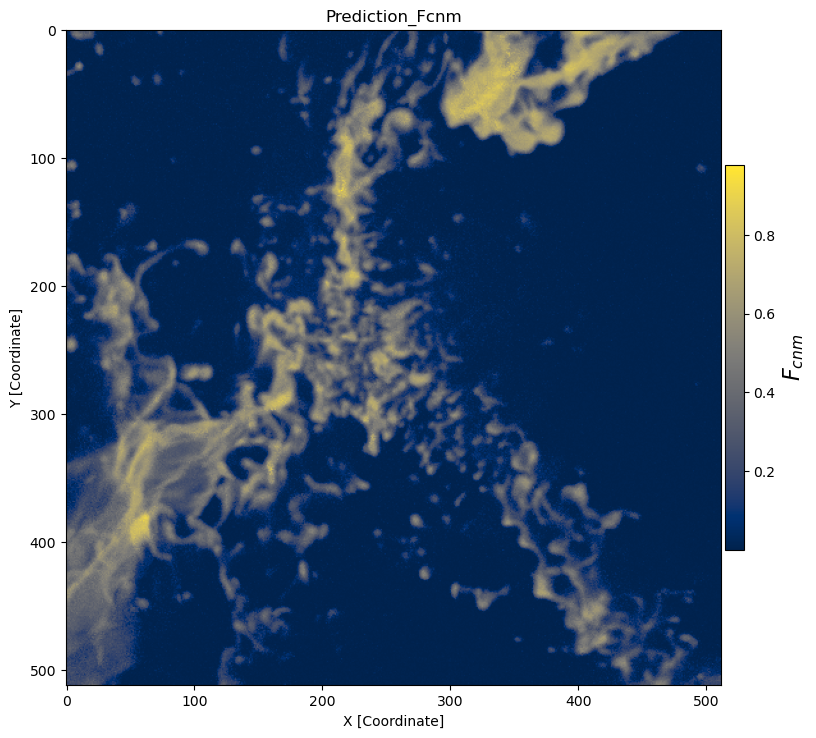

In [12]:
plot_(Fcnm, 'Prediction_Fcnm', 'F_{cnm}')

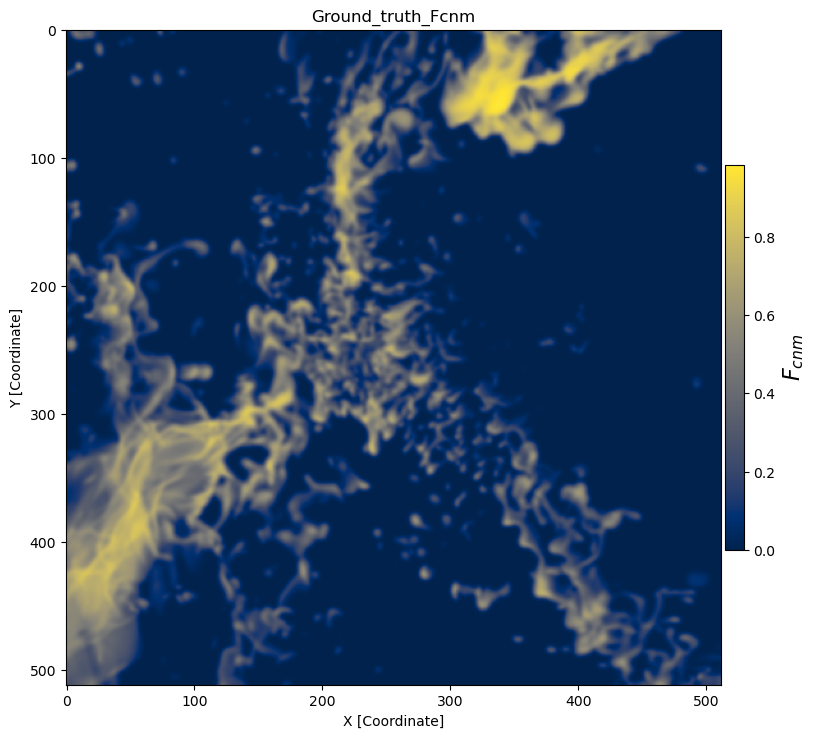

In [13]:
plot_(fcnm_data3, 'Ground_truth_Fcnm', 'F_{cnm}')

# test cnn

In [6]:
weights1 = models.poly_concate_c_weights(device = 'cpu')

C:\Users\Administrator-1\Desktop\New folder (6)\DeepSpectra\lib\poly_concate.pth


In [7]:
model = models.spectra_cnn(weights=weights1, num_output=2, in_channels=1, input_row = 2, input_column=101, drop_out_rate=0, lpe=True)

In [11]:
dictt = dictionarizer.dict_maker(cube=cube3,Rhi=None, Fcnm=None).make_dict()
print(len(dictt))

262144


In [9]:
Fcnm, Rhi = calculator.calculate(dictt = dictt, model=model, device='cpu', num_row=512, num_column=512, PEV='poly_concate')

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000


In [10]:
import matplotlib.pyplot as plt
def plot_(im, title, label):
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='cividis')
    cbar = plt.colorbar(shrink=0.5, pad=0.005)
    cbar.set_label(f'${label}$', size=16)
    plt.title(f'{title}')
    plt.xlabel('X [Coordinate]')
    plt.ylabel('Y [Coordinate]')
    plt.show()

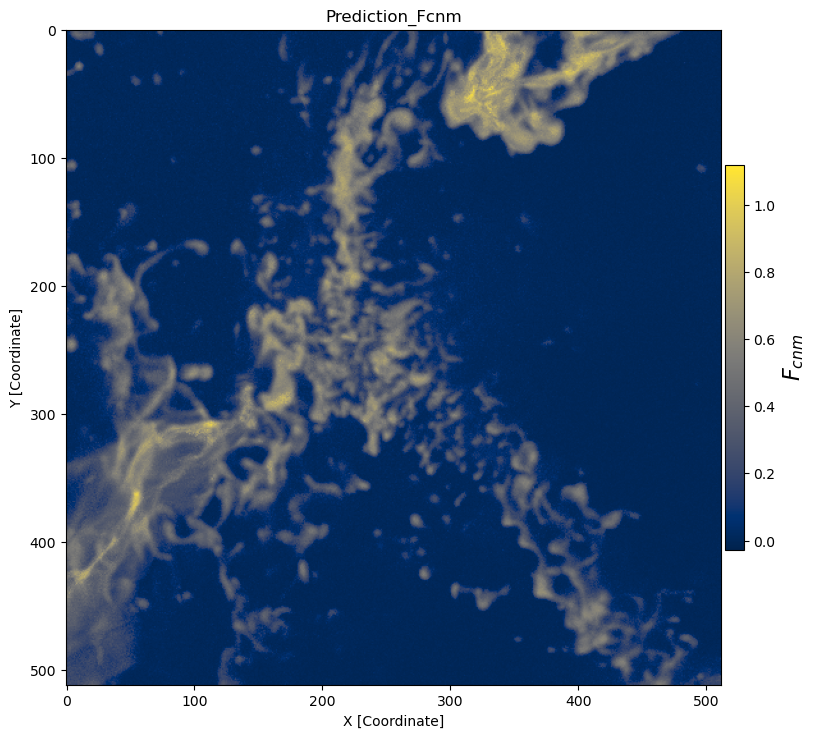

In [11]:
plot_(Fcnm, 'Prediction_Fcnm', 'F_{cnm}')

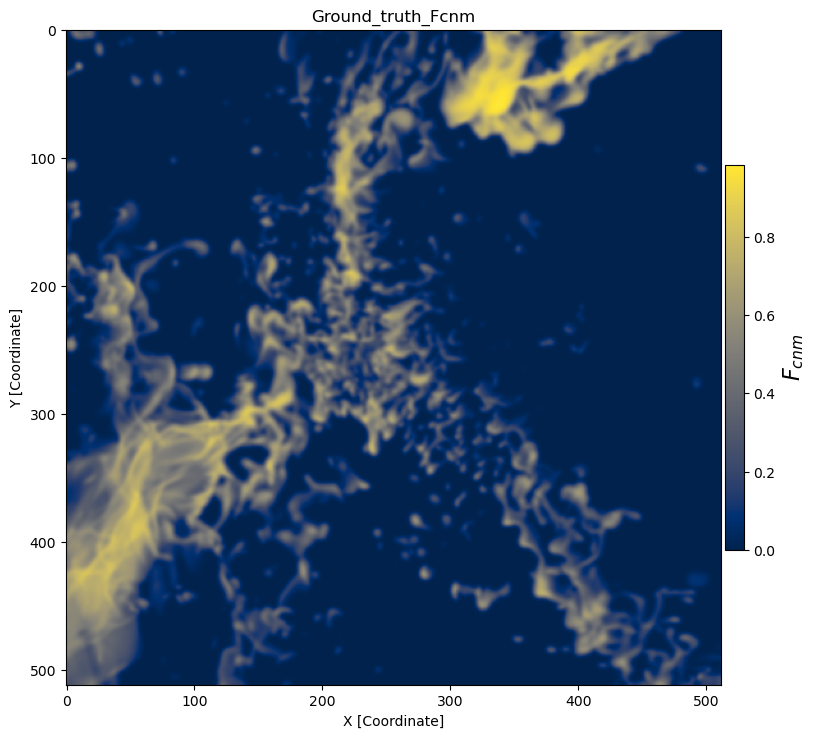

In [12]:
plot_(fcnm_data3, 'Ground_truth_Fcnm', 'F_{cnm}')